# GRIP : The Spark Foundation

### Data Science Business Analytics Intern -  November, 2022 [#GRIPNOV22] 

### Author : Varsha S Thambi

### TASK 1 : Prediction Using Supervised Machine Learning

In this task, we estimate a student's percentage score based on the number of hours studied using the Linear Regression supervised machine learning technique.

### Importing the dataset

In [28]:
# Importing all libraries required in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import library to split the training-test sample 
from sklearn.model_selection import train_test_split

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

# Import library for linear regression 
from sklearn.linear_model import LinearRegression


In [29]:
# Reading data 
df=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\student_scores - student_scores.csv")

### Exploring Data

In [30]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [32]:
# To find the number of rows and columns
df.shape

(25, 2)

In [33]:
# To find more information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [35]:
# Check data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [36]:
# Check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data Analysis 

<AxesSubplot:xlabel='Hours', ylabel='Density'>

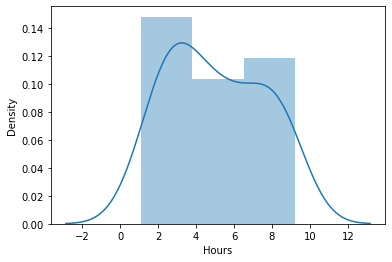

In [37]:
#Check the distribution of Hours
sns.distplot(df['Hours'])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

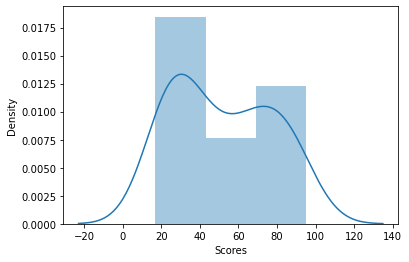

In [38]:
#Check the distribution of Scores
sns.distplot(df['Scores'])


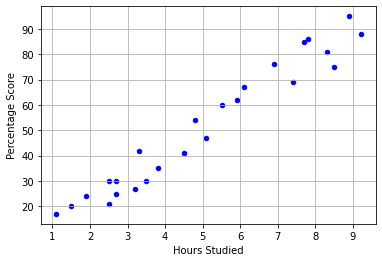

In [39]:
#Scatter plot to find the correlation betweeen Score and Hours
df.plot(kind='scatter',x='Hours',y='Scores',c="blue",style='o')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()


##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [40]:
# Correlation matrix
cor_mat = df.corr()
cor_mat

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


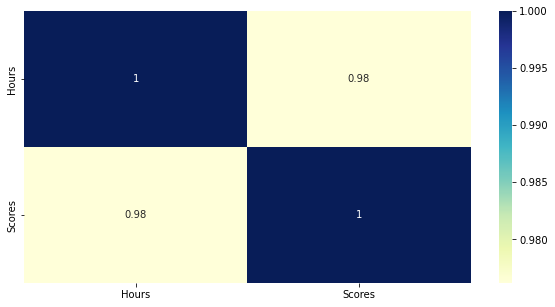

In [41]:
# Plot correlations on a heatmap

# Figure size
plt.figure(figsize=(10,5))

# Heatmap
sns.heatmap(cor_mat, cmap="YlGnBu", annot=True) #YlGnBu
plt.show()

### Preparing the data

 In this step we will divide the data into features(input) and labels(output)

In [42]:
# Create x and y
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [43]:
# Split data into training and test samples
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=0)

In [44]:
# Check sample size
print(xtrain.shape,ytrain.shape, xtest.shape,ytest.shape)

(17, 1) (17,) (8, 1) (8,)


### Training the algorithm

We have split our data into training and testing sets,and now is finally the time to train our algorithm.

In [45]:
# Import library for linear regression 
from sklearn.linear_model import LinearRegression

# Create a model object
regressor=LinearRegression()

# Fit the model
regressor.fit(xtrain,ytrain)

# Check accuracy of training model
regressor.score(xtrain,ytrain)

0.9484997422695115

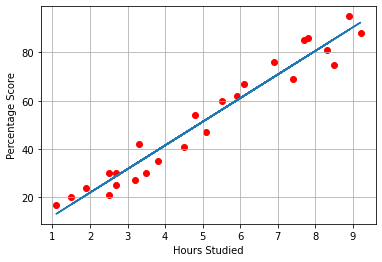

In [46]:
# Plotting the regression line
m=regressor.coef_
c=regressor.intercept_
line =m*x+c

# Plotting for the test data
plt.scatter(x,y,c='r')
plt.plot(x, line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

### Making Predictions

The moment has come to make some predictions now that we have trained our system.

In [47]:
print(xtest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [48]:
# Predict y
y_pred=regressor.predict(xtest)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [49]:
# Check test prediction accuracy
regressor.score(xtest,ytest)

0.9568211104435257

In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [51]:
# Predict the response from xtest
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 92.91505723477056


#### Henct it can be concluded that the predicted score if a person sudies for 9.25 hrs is 92.91
 

### Evaluating the model

Evaluation of the algorithm's performance is the last phase. This stage is crucial for evaluating how well various algorithms operate on a specific dataset. Here, we've gone with the mean square error for simplicity's sake.

In [52]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 4.419727808027651
